In [2]:
#Logistic regression
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
df=pd.read_csv(r"C:\Users\linag\Downloads\logistic_regression_dataset.csv", sep=',')
print(df.head())

   id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0         1.0  
1         0.0  
2         0.0 

In [3]:
df.isnull().sum().sum()

1493

In [4]:
df=df.dropna(axis=0,how='any',inplace=False)
df.isnull().sum().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2927 entries, 1 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2927 non-null   int64  
 1   age              2927 non-null   int64  
 2   education        2927 non-null   float64
 3   sex              2927 non-null   object 
 4   is_smoking       2927 non-null   object 
 5   cigsPerDay       2927 non-null   float64
 6   BPMeds           2927 non-null   float64
 7   prevalentStroke  2927 non-null   int64  
 8   prevalentHyp     2927 non-null   int64  
 9   diabetes         2927 non-null   int64  
 10  totChol          2927 non-null   float64
 11  sysBP            2927 non-null   float64
 12  diaBP            2927 non-null   float64
 13  BMI              2927 non-null   float64
 14  heartRate        2927 non-null   float64
 15  glucose          2927 non-null   float64
 16  TenYearCHD       2927 non-null   float64
dtypes: float64(10), int

In [6]:
df["sex"]=df["sex"].map({"F":0, "M":1})
df["is_smoking"]=df["is_smoking"].map({"YES":0, "NO":1})
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,4.0,1,1,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
2,2,46,1.0,0,0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0.0
3,3,50,1.0,1,0,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
4,4,64,1.0,0,0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0.0
5,5,61,3.0,0,1,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1.0


In [7]:
df['TenYearCHD']= df['TenYearCHD'].apply(lambda x: int(x))
x=df.drop('TenYearCHD',axis=1)
y=df['TenYearCHD']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=2000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy {:.2f}'.format(model.score(x_test, y_test)))

Accuracy 0.85


C:\Users\linag\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: xlabel='predicted', ylabel='actual'>

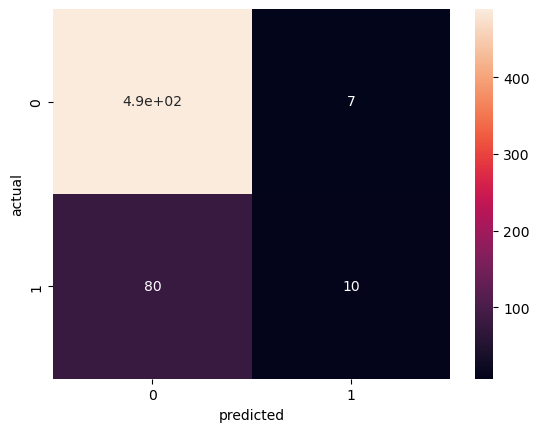

In [8]:
confusion_matrix=pd.crosstab(y_test, y_pred, rownames=['actual'], colnames= ['predicted'])
sns.heatmap(confusion_matrix, annot=True)

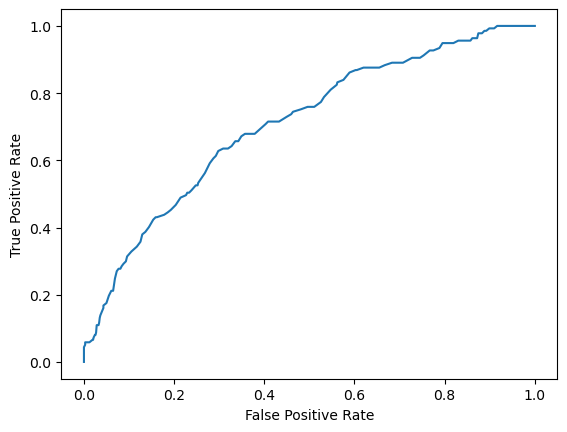

In [10]:
#The ROC-AUC (Receiver Operating Characteristic - Area Under the Curve)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

x=df[['age','is_smoking','sex']]
y=df['TenYearCHD']

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=0)

log_regression = LogisticRegression()

log_regression.fit(x_train, y_train)

y_pred_proba = log_regression.predict_proba(x_test)[::,1]
fpr,tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()